In [27]:
import os
from scipy.io import wavfile
import numpy as np
from IPython.display import Audio
import matplotlib.pyplot as plt

In [23]:
def get_data_dict(datafolder='../../data/archive/recordings'):
    file_names = os.listdir(datafolder)

    data_dict = {}
    for file in file_names:
        key = file.split('.')[0]
        mat = wavfile.read(datafolder + '/{}'.format(file))[1].astype(np.float32)
        data_dict[key] = mat
    return data_dict

In [ ]:
dd = get_data_dict()
print(dd)

18262


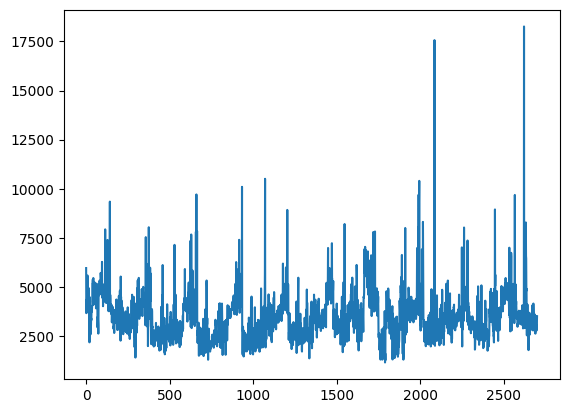

In [31]:
file_names = os.listdir('../../data/archive/recordings_train')
max = 0
lengths = []
for file in file_names:
    mat_len = len(wavfile.read('../../data/archive/recordings_train' + '/{}'.format(file))[1].astype(np.float32))
    lengths.append(mat_len)
    if mat_len > max:
        max = mat_len
        
print(max)
plt.plot(lengths)

9178


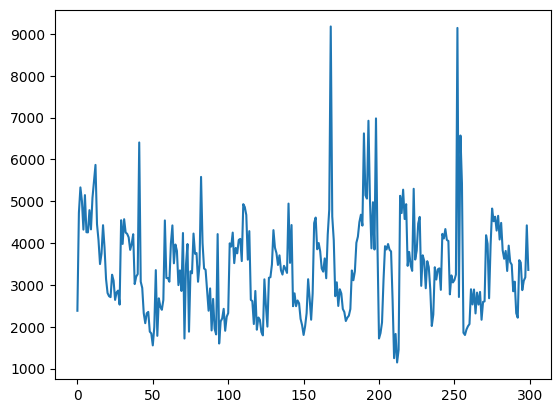

In [32]:
file_names = os.listdir('../../data/archive/recordings_test')
max = 0
lengths = []

for file in file_names:
    mat_len = len(wavfile.read('../../data/archive/recordings_test' + '/{}'.format(file))[1].astype(np.float32))
    lengths.append(mat_len)
    if mat_len > max:
        max = mat_len
        
print(max)
plt.plot(lengths)

In [16]:
Audio(wavfile.read('../../data/archive/recordings_test' + '/0_jackson_0.wav')[1].astype(np.float32), rate=8000)

In [34]:
jackson = wavfile.read('../../data/archive/recordings_test' + '/0_jackson_0.wav')[1].astype(np.float32)
print(len(jackson))
if len(jackson) < 8000:
    jackson_padded = np.append(jackson, np.array([0.0 for i in range(8000 - len(jackson))]))
else:
    jackson_padded = jackson[0:8000]
print(jackson_padded.shape)
Audio(jackson_padded, rate=8000)

5148
(8000,)


In [40]:
def get_data_dict(data):
    data_dict = {}
    for line in data:
        print(line)
        if "[" in line:
            key = line.split()[0]
            mat = []
        elif "]" in line:
            line = line.split(']')[0]
            mat.append([float(x) for x in line.split()])
            data_dict[key]=np.array(mat)
        else:
            mat.append([float(x) for x in line.split()])
    return data_dict

with open('./train_1digit.feat') as f:
    test_data = get_data_dict(f.readlines())
my_dict = get_data_dict(test_data)
print(my_dict)

ac_1a  [

  -23.35901 -19.25983 6.819015 1.192464 1.073842 9.056857 -4.43707 13.45168 -2.058532 1.201817 13.34594 10.39188 19.14497 0.7117496 1.701741 1.048058 -1.132139 -2.300035 -0.0299722 -0.2512369 -3.788185 -4.024942 -4.57422 -3.920727 -4.042562 -1.762403 0.1584284 0.4702107 0.3236625 -0.3230287 -0.9805499 -0.7798319 -0.3273982 -1.54582 -0.7463068 -0.3776312 -0.1352869 -0.4284557 -0.5629961 

  -22.46379 -16.336 9.509974 1.315522 4.676258 16.01371 -3.934596 5.259078 -16.13138 -10.392 -1.884554 -6.078195 10.01824 1.255656 3.066352 2.011334 -1.482856 -4.570226 -2.262345 -2.31138 -6.520723 -6.355066 -4.903043 -2.982224 -3.639628 -1.337538 -0.1939555 -0.3593823 -0.1568447 -0.0922939 -0.05669688 -0.7052898 0.09116052 0.08521891 1.433158 1.556499 1.694908 0.9933344 -0.1081609 

  -20.24788 -12.21305 10.71382 -4.529759 -12.22754 5.428568 -5.944491 -1.392946 -15.14682 -15.87238 1.357548 -1.58589 14.89632 0.2538376 1.110262 0.8817415 -0.8614099 -2.257395 -2.072301 -0.4310535 -5.287996 -1.9

UnboundLocalError: local variable 'mat' referenced before assignment